# Analyza liekov podla skupiny ATC1 
## Otazky:
* Ktore skupiny liekov sa najviac spotrebuvaju ?
* Ako sa meni spotreba podla jednotlivych kategorii ?
* Ako to suvisi s pandemiou ?

In [82]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%run tables.py

In [83]:
# Creating: detailed_table[year] 

detailed_tables = {}
for year in range(2015,2020):
    detailed_tables[year] = import_table('detailed',year).groupby('ATC1_popis').sum().sort_values(by='Počet balení',ascending=False)
    del detailed_tables[year]['ROK SPRAC']
    detailed_tables[year]['CENA'] =  detailed_tables[year]['Úhrada_SPOLU'] / detailed_tables[year]['Počet balení']
display(2019)
display(detailed_tables[2019].head())

2019

,Počet balení,Úhrada_ZP,Úhrada_PAC,Úhrada_SPOLU,CENA
ATC1_popis,,,,,
Kardiovaskulárny systém,3.009478e+07,1.366732e+08,73614509.50,2.102878e+08,6.987516
Nervový systém,2.528963e+07,1.029034e+08,58926530.22,1.618300e+08,6.399066
Tráviaci trakt a metabolizmus,2.003817e+07,1.562717e+08,76696058.77,2.329677e+08,11.626196
Respiračný systém,1.780014e+07,5.968704e+07,73856187.61,1.335432e+08,7.502369
Krv a krvotvorné orgány,1.367591e+07,2.253825e+08,13245441.18,2.386280e+08,17.448775


In [84]:
# Creating: detailed_table[2020] 

temp = import_table('detailed',2020) 
detailed_tables[2020] = temp['Q1'].groupby('ATC1_popis').sum().sort_index()
#display(temp['Q1'].groupby('ATC1_popis').sum().sort_index().shape)
for i in range(2,4):
    #display(temp[f'Q{i}'].groupby('ATC1_popis').sum().sort_index().shape)
    detailed_tables[2020] =  detailed_tables[2020] + temp[f'Q{i}'].groupby('ATC1_popis').sum().sort_index()
del detailed_tables[2020]['ROK SPRAC']
detailed_tables[2020] = detailed_tables[2020].sort_values(by='Počet balení',ascending=False)
detailed_tables[2020]['Počet balení_estimated'] = detailed_tables[2020]['Počet balení']/75 * 100
display(detailed_tables[2020].head())

,Počet balení,Počet balení_estimated
ATC1_popis,,
Kardiovaskulárny systém,2.243462e+07,2.991283e+07
Nervový systém,1.941885e+07,2.589180e+07
Tráviaci trakt a metabolizmus,1.430232e+07,1.906976e+07
Respiračný systém,1.142406e+07,1.523209e+07
Rôzne,9.502924e+06,1.267056e+07


In [85]:
temp = {}
temp['ATC1_popis'] = []
for i in detailed_tables[2020].index:
    temp['ATC1_popis'] += [i]
    for j in range(2015,2021):
        if j not in temp:
            temp[j] = []
        if j ==2019 and i == '(prázdne)':
            temp[j] += [detailed_tables[j].loc['(prazdne)','Počet balení']]
        elif j == 2020:
            temp[j] += [detailed_tables[j].loc[i,'Počet balení_estimated']]
        else:
            temp[j] += [detailed_tables[j].loc[i,'Počet balení']]
detailed_tables['all'] =  pd.DataFrame(temp).set_index('ATC1_popis')
detailed_tables['all'] = detailed_tables['all'].rename(index={'Systémové hormonálne prípravky okrem pohlavných hormónov':'Hormonálne prípravky okrem pohlavných'})
display(detailed_tables['all'].head())

,2015,2016,2017,2018,2019,2020
ATC1_popis,,,,,,
Kardiovaskulárny systém,3.187437e+07,3.146644e+07,3.072354e+07,3.032789e+07,3.009478e+07,2.991283e+07
Nervový systém,2.565168e+07,2.565618e+07,2.507354e+07,2.561874e+07,2.528963e+07,2.589180e+07
Tráviaci trakt a metabolizmus,1.918639e+07,1.965176e+07,1.968389e+07,1.992195e+07,2.003817e+07,1.906976e+07
Respiračný systém,1.703448e+07,1.678311e+07,1.720150e+07,1.771564e+07,1.780014e+07,1.523209e+07
Rôzne,1.409553e+07,1.374374e+07,1.303431e+07,1.280559e+07,1.165731e+07,1.267056e+07


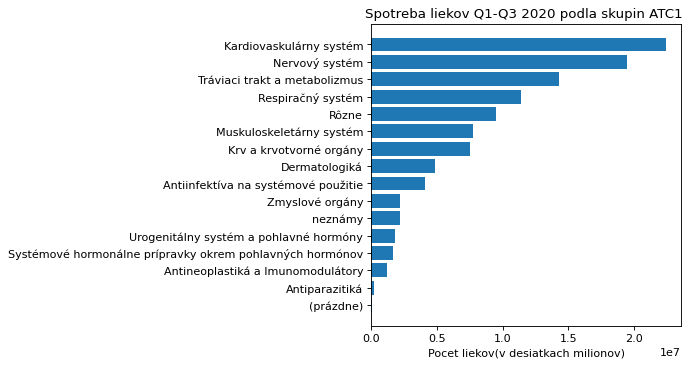

In [86]:
plt.figure(figsize=(5, 5), dpi=80)
plt.barh(y=detailed_tables[2020].sort_values(by='Počet balení',ascending=True).index,
width=detailed_tables[2020].sort_values(by='Počet balení',ascending=True)['Počet balení'])
plt.xlabel('Pocet liekov(v desiatkach milionov)')
plt.title('Spotreba liekov Q1-Q3 2020 podla skupin ATC1 ')
plt.show()

## Pozorovanie
Na grafe je vidiet ze v roku 2020 bolo najviac spotrebovanych liekov v oblastiach:
* Kardiovaskulárny systém
* Nervový systém
* Tráviaci trakt a metabolizmus
* Respiračný systém
* Rôzne
* Muskuloskeletárny systém

Dalej chceme zistit ci rastie alebo klesa spotreba liekov v tych oblastiach

In [87]:
temp = import_table('all',2019)
tab2019_Q13 = temp['Q1'].loc[:,['LIEK_popis','Počet balení_Q1']].rename(columns={'Počet balení_Q1':'Počet balení_Q1-Q3'})
for index in 'Q2','Q3':
    tab2019_Q13['Počet balení_Q1-Q3'] += temp[index][f'Počet balení_{index}']

temp = import_table('detailed',2019)
temp.drop_duplicates(subset='LIEK_popis',inplace=True)
temp = temp[['LIEK_popis','ATC1_popis']]

tab2019_Q13 = tab2019_Q13.merge(temp,on='LIEK_popis').groupby('ATC1_popis').sum().sort_values(by='Počet balení_Q1-Q3',ascending=False)
tab2019_Q13 = tab2019_Q13.rename(index={'(prazdne)':'(prázdne)'})
display(tab2019_Q13.head())

,Počet balení_Q1-Q3
ATC1_popis,
Kardiovaskulárny systém,2.232247e+07
Nervový systém,1.840355e+07
Tráviaci trakt a metabolizmus,1.452565e+07
Respiračný systém,1.256299e+07
Krv a krvotvorné orgány,1.071284e+07


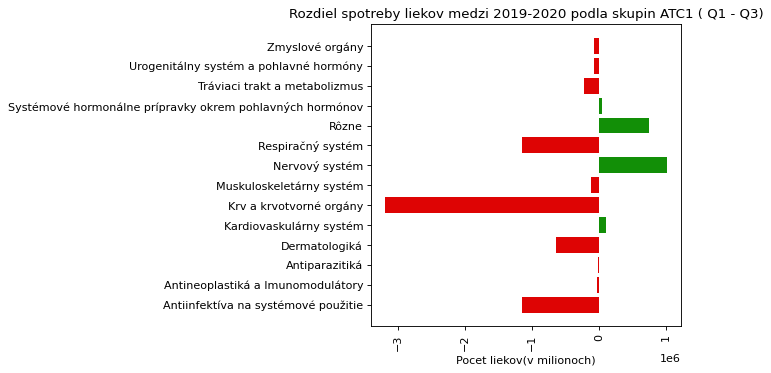

In [88]:
temp2020 = detailed_tables[2020].sort_index()
temp2019 = tab2019_Q13.sort_index()

temp2019 =  temp2019.drop(index=['neznámy',"(prázdne)"])
temp2020 =  temp2020.drop(index=['neznámy',"(prázdne)"])

color = ['#de0404' if diff < 0 else '#128f07' for diff in temp2020['Počet balení'] - temp2019['Počet balení_Q1-Q3']]

plt.figure(figsize=(5, 5), dpi=80)
plt.barh(width= temp2020['Počet balení'] - temp2019['Počet balení_Q1-Q3'] , y=temp2020.sort_index().index,color=color)
plt.xticks(rotation=90)
plt.xlabel('Pocet liekov(v milionoch)')
plt.title('Rozdiel spotreby liekov medzi 2019-2020 podla skupin ATC1 ( Q1 - Q3)')
plt.show()

## Pozorovanie
Z kategorii z ktorych najviac liekov se spotrebovali za rok 2020 zazili narast:
* Nervovy system
* Rozne

Ostatne kategorie bud stagnju alebo zazivaju znacny pokles, co je pozitivna sprava. To moze byt zapricinene zlepsujucim zivotnym standartom.

Poznamky:
* Preco ludia viac uzivaju lieky na nervovy system  ? 
* Zvysila sa spotreba vaznejsich liekov alebo menej vaznych ?
* Expandovala definicia pre kategoriu rozne ?


## Nervova sustava


In [126]:
temp = import_table('detailed',2020)
for i in temp:
    temp[i] = temp[i][['ATC1_popis','ATC2_popis','Počet balení']].query("ATC1_popis == 'Nervový systém'").groupby('ATC2_popis').sum()
tab_atc2 = temp['Q1'].rename(columns={'Počet balení':2020})
for i in 'Q2','Q3':
    tab_atc2[2020] += temp[i]['Počet balení']
tab_atc2 = tab_atc2.sort_values(by=2020,ascending=False)

temp = import_table('all',2019)
tab2019_Q13_atc2 = temp['Q1'].loc[:,['LIEK_popis','Počet balení_Q1']].rename(columns={'Počet balení_Q1':'Počet balení_Q1-Q3'})
for index in 'Q2','Q3':
    tab2019_Q13_atc2['Počet balení_Q1-Q3'] += temp[index][f'Počet balení_{index}']

temp = import_table('detailed',2019)
temp.drop_duplicates(subset='LIEK_popis',inplace=True)
temp = temp[['LIEK_popis','ATC2_popis','ATC1_popis']]
temp = temp.query('ATC1_popis == "Nervový systém"')

tab2019_Q13_atc2 = tab2019_Q13_atc2.merge(temp,on='LIEK_popis').groupby('ATC2_popis').sum().sort_values(by='Počet balení_Q1-Q3',ascending=False)
tab_atc2[2019] = tab2019_Q13_atc2['Počet balení_Q1-Q3']
tab_atc2 = tab_atc2.reset_index()
tab_atc2.iloc[4,0] = 'Ine'
display(tab_atc2)

,ATC2_popis,2020,2019
0,Analgetiká,7974477.098,7116060.683
1,Psycholeptiká,6060131.192,5924671.855
2,Psychoanaleptiká,3094981.021,3027177.859
3,Antiepileptiká,1090185.074,1083498.718
4,Ine,552903.699,579923.085
5,Anestetiká,324843.102,352392.596
6,Antiparkinsoniká,321326.401,319820.728


### Poznamky
* Analgetika su na zmiernenie bolesti
* Psycholeptiká su na liecbu schizofrenie a uzkosti
* Psychoanaleptiká su na zvysenie ucinnosti nervovej sustavy ( kofein, kokain ...)
* Antiepileptiká su na liecbu epilepsie
* Anestetiká su na znecitlivenie organizmu
* Antiparkinsoniká su na liecbu parkinsona

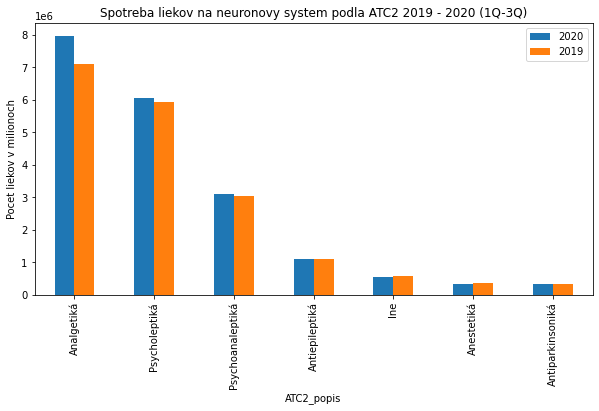

In [127]:
ax = tab_atc2.plot(x='ATC2_popis',y=[2020,2019], kind='bar',figsize=(10,5))
ax.set_ylabel('Pocet liekov v milionoch')
ax.set_title('Spotreba liekov na neuronovy system podla ATC2 2019 - 2020 (1Q-3Q)')
plt.show()

## Pozorovanie
Podla tabulky a grafov je zjavne ze za zvysenie spotreby liekov pre neuronovy system mozu hlavne analgetika. Dalej sa pozreme na to ako sa tieto kategorie vyvyjali od roku 2015 do 2019 (2020 nie kvoli neuplnym datam)

In [156]:
for year in range(2015,2020):
    temp = import_table('detailed',year)
    temp = temp.query("ATC1_popis == 'Nervový systém'")
    temp = temp[['ATC2_popis','Počet balení']]
    if year == 2015:
        neural_drugs = temp.groupby('ATC2_popis').sum().rename(columns={'Počet balení':2015}).sort_index()
    else:
        neural_drugs[year] = temp.groupby('ATC2_popis').sum()['Počet balení'].sort_index()
neural_drugs = neural_drugs.sort_values(by=2019,ascending=False).reset_index()
neural_drugs.iloc[4,0] = 'Ine'
display(neural_drugs)

,ATC2_popis,2015,2016,2017,2018,2019
0,Analgetiká,1.085115e+07,1.064193e+07,1.036591e+07,1.040837e+07,9950472.697
1,Psycholeptiká,7.718598e+06,7.754001e+06,7.468977e+06,7.739591e+06,8016420.272
2,Psychoanaleptiká,3.786101e+06,3.846344e+06,3.859802e+06,4.019187e+06,4148844.542
3,Antiepileptiká,1.552458e+06,1.653421e+06,1.634450e+06,1.642543e+06,1467449.179
4,Ine,7.514569e+05,7.736741e+05,7.717053e+05,7.913905e+05,785336.726
5,Anestetiká,5.582256e+05,5.453249e+05,5.424734e+05,5.917541e+05,487995.703
6,Antiparkinsoniká,4.336952e+05,4.414777e+05,4.302279e+05,4.259033e+05,433107.009


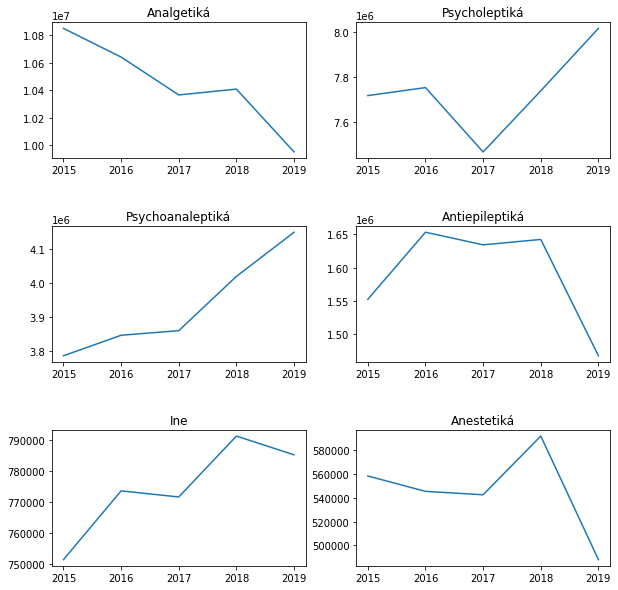

In [157]:
fig, ax = plt.subplots(3,2,figsize=(10,10))
fig.subplots_adjust(hspace =0.5)
for i in range(3):
    for j in range(2):
        ax[i,j].set_title(neural_drugs.iloc[i*2 + j,0])
        ax[i,j].plot(range(2015,2020),neural_drugs.iloc[i*2 + j,1:] )

## Pozorovanie
* Na zaklade dat vieme usudit ze zvysenie spotreby analgetik moze suvisiet s pandemiou kedze medzi rokmi 2015 - 2019 zazivala tato kategoria pokles a dalsi rok priniesol analgetikam najvyssi narast s pomedzi liekov na nervovu sustavu ( ktore mali aj navyssi narast celkovo takze pravdepodobne analgetika najviac narastli aj s pomedzi ATC2 - treba ale overit).
    * Kedze horucka sa lieci s analgetikami co je jeden s priznakov Covidu 19, tak to moze vysvetlovat narast tychto liekov pocas roku pandemie
* Psycholeptika a psychoanaleptika maju stupajuci trend od roku 2015 takze s ich narastom pravdepodobne pandemia nema vela spolocneho
### Poznamky:
* mozme sa pozriet na konkretne lieky ktore sa zvysili medzi psycholeptikami a psychoanaleptikami aby sme lepsie pochopili preco sa viac uzivaju